In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
label_to_name = {
    '0': 'airplane',
    '1': 'cabinet',
    '2': 'car',
    '3': 'chair',
    '4': 'lamp',
    '5': 'sofa',
    '6': 'table',
    '7': 'watercraft',
    '8': 'bed',
    '9': 'bench',
    '10': 'bookshelf',
    '11': 'bus',
    '12': 'guitar',
    '13': 'motorbike',
    '14': 'pistol',
    '15': 'skateboard',
}

In [53]:
# Use either /home/public/MVP/MVP_Train_CP.h5 or /home/public/MVP/MVP_Test_CP.h5
with h5py.File('/home/public/MVP/MVP_Train_CP.h5', 'r') as f:
    complete_pcds = f['complete_pcds'][:] # (2400, 2048, 3)
    incomplete_pcds = f['incomplete_pcds'][:] # (62400, 2048, 3)
    labels = f['labels'][:] # (62400,)
    print(labels.shape)

(62400,)


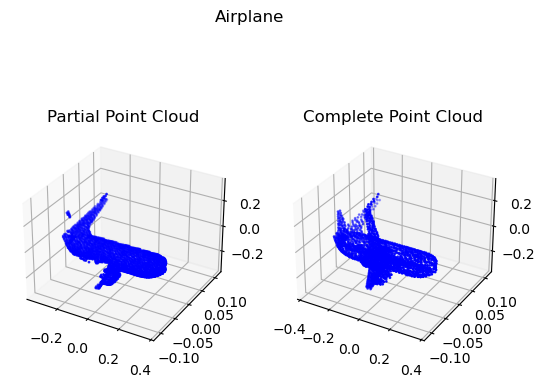

In [55]:
idx = 26
partial = incomplete_pcds[idx]
complete = complete_pcds[idx // 26]
label = labels[idx]

# Plot partial and complete side by side
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(partial[:, 0], partial[:, 1], partial[:, 2], s=1, c='b', marker='o')
ax1.set_title('Partial Point Cloud')
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(complete[:, 0], complete[:, 1], complete[:, 2], s=1, c='b', marker='o')
ax2.set_title('Complete Point Cloud')
fig.suptitle(label_to_name[str(label)].capitalize())
plt.show()

In [3]:
# Use either /home/public/MVP/MVP_Train_RG.h5 or /home/public/MVP/MVP_Test_RG.h5
with h5py.File('/home/public/MVP/MVP_Train_RG.h5', 'r') as f:
    print(f.keys())
    # Source and target are both incomplete point clouds of same model
    src = f['src'][:] # (6400, 2048, 3)
    tgt = f['tgt'][:] # (6400, 2048, 3)
    complete = f['complete'][:] # (2048, 3)
    cat_labels = f['cat_labels'][:] # (6400,)
    
    # Partial point cloud pairs with "match_level = 1" mostly have more correspondences than those with "match_level = 0"
    match_level = f['match_level'][:] # (6400,) 

<KeysViewHDF5 ['cat_labels', 'complete', 'match_id', 'match_level', 'src', 'tgt']>


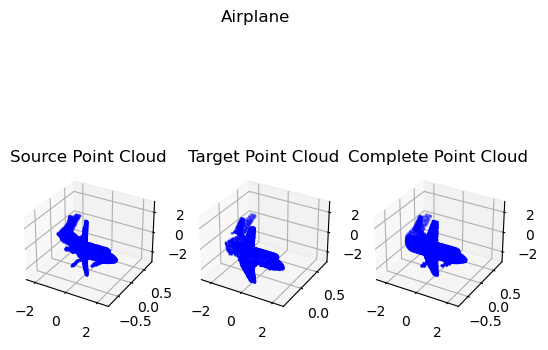

In [4]:
idx = 100
src_pcd = src[idx]
tgt_pcd = tgt[idx]
complete_pcd = complete[idx]
cat_label = cat_labels[idx]

# Plot source, target and complete side by side
fig = plt.figure()
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(src_pcd[:, 0], src_pcd[:, 1], src_pcd[:, 2], s=1, c='b', marker='o')
ax1.set_title('Source Point Cloud')
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(tgt_pcd[:, 0], tgt_pcd[:, 1], tgt_pcd[:, 2], s=1, c='b', marker='o')
ax2.set_title('Target Point Cloud')
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(complete_pcd[:, 0], complete_pcd[:, 1], complete_pcd[:, 2], s=1, c='b', marker='o')
ax3.set_title('Complete Point Cloud')
fig.suptitle(label_to_name[str(cat_label)].capitalize())

plt.show()